## PRACA DOMOWA

Pracę domową (**pojedynczy plik** notatnika z rozszerzeniem .ipynb) należy przesłać za pośrednictwem platformy *MS Teams* (moduł Zadania) do poniedziałku **15 stycznia 2024 roku do godziny 9:00**. Przesłanie rozwiązania po terminie skutkuje otrzymaniem 0 punktów za tę pracę domową.

**D1** (*4 punkty*). Równanie przewodnictwa ciepła z zerowymi warunkami brzegowymi opisuje rozkład temperatury jednorodnego pręta o zadanej długości $L>0$ i danym współczynniku przewodzenia ciepła $b>0$, którego końce utrzymywane są w temperaturze zera stopni, a temperatura początkowa jest określona przez daną funkcję $f$:
$$ \begin{cases}
u_{t} - b u_{xx} = 0 & \text{dla }x\in(0,L),\,t>0, \\
u(0,t) = u(L,t) = 0 & \text{dla }t>0, \\
u(x,0) = f(x) & \text{dla }x\in(0,L),
\end{cases}$$
Stosując metodę rozdzielenia zmiennych można znaleźć rozwiązanie takiego zagadnienia, które jest zadane wzorem:
$$u(x,t) = \sum_{n=1}^{\infty} c_n e^{-b\left(\frac{n\pi}{L}\right)^2t}\sin\left(\frac{n\pi x}{L}\right) , \quad
\text{gdzie }\quad
c_n = \frac{2}{L}\int_{0}^{L} f(x)\sin\left(\frac{n\pi x}{L}\right)\, dx.$$
Opierając się na kodzie, który powstał podczas zajęć, przedstaw animację pokazującą rozkład temperatury jednorodnego pręta o długości $L=1$ (i stałej rozchodzenia się ciepła $b=1$), którego końce utrzymywane są w temperaturze zera stopni, a temperatura początkowa jest zadana funkcją $f(x)=2x(1-x)$. Do obliczeń użyj pierwszych $n=40$ wyrazów szeregu Fouriera, a animację wykonaj dla $t\in [0,2]$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square, sawtooth
from scipy.integrate import quad
from math import*

In [ ]:
L = 1
b = 1

x = np.arange(0, L, 0.001)

f = 2*x*(1-x)

n = 40

Cn = []
sum = 0

In [22]:
fs = lambda x: 2*x*(1-x)*np.sin((i*np.pi*x)/L)

In [ ]:
#for i in range(n):
 #   cn = (2/L)*quad(fs, 0, L)[0]
  #  Cn.append(cn)
    
#for i in range(n):
 #   if i == 0.0:
  #      sum = 0
   # else:
    #    sum = sum + (Cn[i] * np.sin(i*np.pi*x / L))

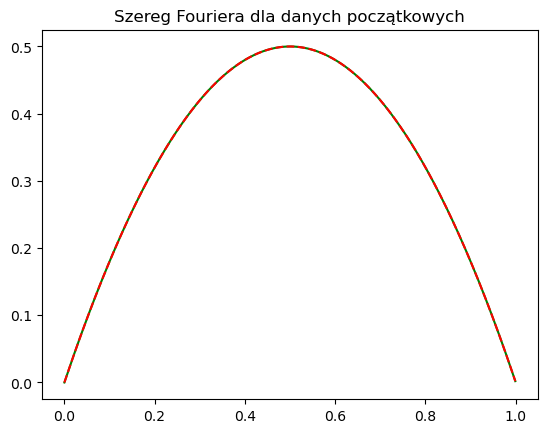

In [35]:
#plt.plot(x, sum, 'g')
#plt.plot(x, f, 'r--')
#plt.title("Szereg Fouriera dla danych początkowych")
#plt.show()

In [51]:
x_np = np.arange(0, L, 0.001)
t_np = np.arange(0, 2, 0.01)

X, T = np.meshgrid(x_np, t_np)

U = 0
for i in range(n):
    if i == 0.0:
        U = 0
    else:
        U = U + (Cn[i] * np.sin(i * np.pi * X / L) * np.exp((-b)*((i*np.pi/L)**2)*T))

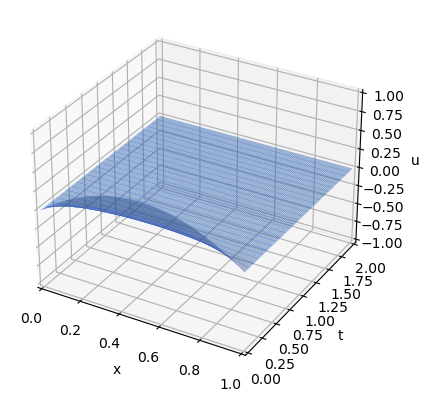

In [52]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot_surface(X, T, U, edgecolor='royalblue', lw=0.1, rstride=8, cstride=8, alpha=0.3)
ax.set(xlim=(0, L), ylim=(0, 2), zlim=(-1, 1), xlabel='x', ylabel='t', zlabel='u')
plt.show()

In [53]:
import matplotlib as mpl
import matplotlib.animation as anim
from IPython.display import HTML

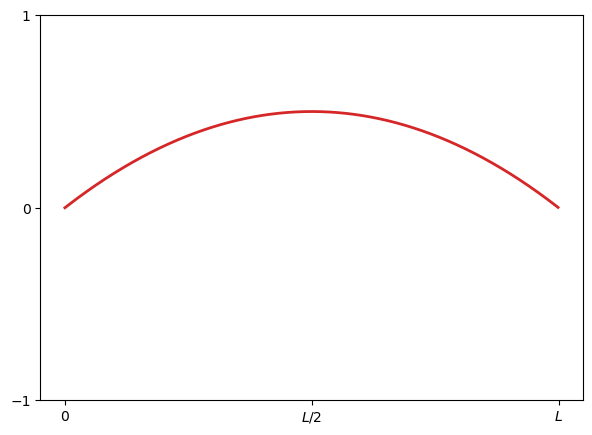

In [54]:
x = x_np
y = U[0,:]

fig, ax = plt.subplots(figsize = (7, 5))
wavepacket, = ax.plot(x, y, "-", color = "C3", lw = 2)

ax.set_xticks([0, L/2, L])
ax.set_xticklabels(("0", r"$L/2$", r"$L$"))
ax.set_yticks((-1, 0, 1))

def wave(i, c=1):
    # Pobranie kolejnej klatki czasowej
    new_y = U[i,:]
    wavepacket.set_ydata(new_y)
    return(wavepacket,)

# Wygenerowanie animacji
ani = anim.FuncAnimation(fig, wave, frames = 200, fargs = (-0.03,), interval = 50, blit = True)

In [55]:
HTML(ani.to_jshtml())